## **Proyek Predictive Analytic Arif Kurniawan**

# Import Library

In [1]:
# Instalasi dan Pembaruan ipywidgets
!pip install --upgrade ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [2]:
#Pada bagian ini, kita mengimpor berbagai library yang akan digunakan dalam proyek predictive analytics:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler


# Data Understanding

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

## Data Loading

Data Loading merupakan tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami. Untuk informasi datasets ini telah di bersihan dan normalisasi terlebih dahulu

In [3]:
#memasukan dataset yang akan di pakai
df = pd.read_csv('crop_recommendation_dataset.csv')
df.head()

Temperature   Humidity    Rainfall        PH  Nitrogen  Phosphorous  \
0    20.879744  82.002744  202.935536  6.502985     69.30     79.50000   
1    21.770462  80.319644  226.655537  7.038096     72.02    141.82400   
2    23.004459  82.320763  263.964248  7.633568     77.77     59.39000   
3    26.491096  80.283629  242.864034  6.980401     78.65    147.45895   
4    20.280071  81.604873  262.717340  7.628473     73.98     68.95000   

   Potassium  Carbon        Soil  Crop  
0    94.4400    0.63  Loamy Soil  rice  
1   141.6978    1.40  Loamy Soil  rice  
2    81.8900    1.80  Peaty Soil  rice  
3   142.9430    1.43  Loamy Soil  rice  
4    95.7400    1.75  Peaty Soil  rice

# Exploratory Data Analysis (EDA)

Exploratory data analysis merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data. Teknik ini biasanya menggunakan bantuan statistik dan representasi grafis atau visualisasi.

## Deskripsi Variabel

In [4]:
#melihat jumlah data keseluruhan
df.shape

(3100, 10)

Dari data di atas dapat melihat bahwa pada dataset ini terdapat 3100 baris dan 10 kolom. Diantaranya:

```Temperature```: Suhu udara (°C) yang memengaruhi pertumbuhan tanaman.

```Humidity```: Kelembapan udara (%) yang berpengaruh pada proses transpirasi.

```Rainfall```: Curah hujan (mm), penting untuk kebutuhan air tanaman.

```PH```: Tingkat keasaman tanah, memengaruhi penyerapan unsur hara.

```Nitrogen```: Kandungan nitrogen, mendukung pertumbuhan daun.

```Phosphorous```: Kandungan fosfor, penting untuk akar dan pembungaan.

```Potassium```: Kandungan kalium, membantu ketahanan tanaman.

```Carbon```: Kandungan karbon organik, meningkatkan kesuburan tanah.

```Soil```: Jenis tanah (misal: lempung, pasir), memengaruhi struktur dan drainase.

```Crop```: Jenis tanaman yang menjadi target prediksi.

In [5]:
#melihat informasi struktur pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3100 non-null   float64
 1   Humidity     3100 non-null   float64
 2   Rainfall     3100 non-null   float64
 3   PH           3100 non-null   float64
 4   Nitrogen     3100 non-null   float64
 5   Phosphorous  3100 non-null   float64
 6   Potassium    3100 non-null   float64
 7   Carbon       3100 non-null   float64
 8   Soil         3100 non-null   object 
 9   Crop         3100 non-null   object 
dtypes: float64(8), object(2)
memory usage: 242.3+ KB


* Terdapat 7 kolom numerik dengan tipe float64, yaitu: temperatur, humidity, rainfall, ph, nitrogen, phosphorous, potassium dan carbon color, dan clarity. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.

* Terdapat 2 kolom dengan tipe data object yaitu: soil dan crop. Kolom ini merupakan categorical features (fitur non-numerik).

In [6]:
#Statistik Deskriptif Dataset
df.describe()

Temperature     Humidity     Rainfall           PH     Nitrogen  \
count  3100.000000  3100.000000  3100.000000  3100.000000  3100.000000   
mean     27.105071    66.005004   110.212026     6.368656    61.236056   
std       7.545380    23.996884    63.894459     0.801479     8.391950   
min       9.944995    10.199589    20.757078     3.686162    50.580000   
25%      22.810495    55.366047    64.997024     5.896095    55.395000   
50%      26.087226    68.918967    97.057093     6.342518    59.265000   
75%      29.343867    84.446524   141.210784     6.839783    64.962500   
max      54.779935    99.646348   385.086491     9.407343    96.197500   

       Phosphorous    Potassium       Carbon  
count  3100.000000  3100.000000  3100.000000  
mean     70.195388    69.553449     1.478071  
std      34.897833    29.464613     0.577143  
min      32.896500    41.841500     0.500000  
25%      45.255000    50.760000     0.980000  
50%      57.640000    56.895000     1.470000  
75%      82.212500    73.592500     1.980000  
max     149.099313   149.224250     2.500000

Fungsi ```describe()``` memberikan informasi statistik pada masing-masing kolom, antara lain:

* ```Count``` adalah jumlah sampel pada data.
* ```Mean``` adalah nilai rata-rata.
* ```Std``` adalah standar deviasi.
* ```Min``` yaitu nilai minimum setiap kolom.
* ```25%``` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* ```50%``` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* ```75%``` adalah kuartil ketiga.
* ```Max``` adalah nilai maksimum.

# Missing Value

In [7]:
#melihat apakah terdapat bagian yang duplicate pada dataset
df.duplicated().sum()

np.int64(0)

Melihat apakah terdapat data yang terduplikat.

In [8]:
#Distribusi Kelas Target (Crop)
df.Crop.value_counts(normalize=True)

Crop
rice            0.032258
wheat           0.032258
Mung Bean       0.032258
Tea             0.032258
millet          0.032258
maize           0.032258
Lentil          0.032258
Jute            0.032258
Coffee          0.032258
Cotton          0.032258
Ground Nut      0.032258
Peas            0.032258
Rubber          0.032258
Sugarcane       0.032258
Tobacco         0.032258
Kidney Beans    0.032258
Moth Beans      0.032258
Coconut         0.032258
Black gram      0.032258
Adzuki Beans    0.032258
Pigeon Peas     0.032258
Chickpea        0.032258
banana          0.032258
grapes          0.032258
apple           0.032258
mango           0.032258
muskmelon       0.032258
orange          0.032258
papaya          0.032258
pomegranate     0.032258
watermelon      0.032258
Name: proportion, dtype: float64

In [9]:
#Pengecekan Missing Values

df.isnull().sum()


Temperature    0
Humidity       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
dtype: int64

In [10]:
# Menampilkan Baris dengan Missing Values
data_miss = df[df.isnull().any(axis=1)]
data_miss

Empty DataFrame
Columns: [Temperature, Humidity, Rainfall, PH, Nitrogen, Phosphorous, Potassium, Carbon, Soil, Crop]
Index: []

pada data ini tidak terdapat duplicate

In [11]:
# Menampilkan kembali Statistik Deskriptif pada Dataset
df.describe()

Temperature     Humidity     Rainfall           PH     Nitrogen  \
count  3100.000000  3100.000000  3100.000000  3100.000000  3100.000000   
mean     27.105071    66.005004   110.212026     6.368656    61.236056   
std       7.545380    23.996884    63.894459     0.801479     8.391950   
min       9.944995    10.199589    20.757078     3.686162    50.580000   
25%      22.810495    55.366047    64.997024     5.896095    55.395000   
50%      26.087226    68.918967    97.057093     6.342518    59.265000   
75%      29.343867    84.446524   141.210784     6.839783    64.962500   
max      54.779935    99.646348   385.086491     9.407343    96.197500   

       Phosphorous    Potassium       Carbon  
count  3100.000000  3100.000000  3100.000000  
mean     70.195388    69.553449     1.478071  
std      34.897833    29.464613     0.577143  
min      32.896500    41.841500     0.500000  
25%      45.255000    50.760000     0.980000  
50%      57.640000    56.895000     1.470000  
75%      82.212500    73.592500     1.980000  
max     149.099313   149.224250     2.500000

In [12]:
# melakukan encoding untuk mengubah fitur kategorikal ke numerik
label_encoder = LabelEncoder()
df['Soil_encoded'] = label_encoder.fit_transform(df['Soil'])


In [13]:
# Menghapus Kolom Asli Setelah Encoding
df = df.drop('Soil', axis=1)


In [14]:
# Informasi Struktur Dataset Setelah Preprocessing

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   3100 non-null   float64
 1   Humidity      3100 non-null   float64
 2   Rainfall      3100 non-null   float64
 3   PH            3100 non-null   float64
 4   Nitrogen      3100 non-null   float64
 5   Phosphorous   3100 non-null   float64
 6   Potassium     3100 non-null   float64
 7   Carbon        3100 non-null   float64
 8   Crop          3100 non-null   object 
 9   Soil_encoded  3100 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 242.3+ KB


Jumlah data Float64 ada 7, int64 ada 1 dan object ada 1.

In [15]:
#Mengubah Tipe Data Kolom Soil_encoded
df["Soil_encoded"] = df["Soil_encoded"].astype("float64")

In [16]:
# Memeriksa Struktur Data Setelah Perubahan Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperature   3100 non-null   float64
 1   Humidity      3100 non-null   float64
 2   Rainfall      3100 non-null   float64
 3   PH            3100 non-null   float64
 4   Nitrogen      3100 non-null   float64
 5   Phosphorous   3100 non-null   float64
 6   Potassium     3100 non-null   float64
 7   Carbon        3100 non-null   float64
 8   Crop          3100 non-null   object 
 9   Soil_encoded  3100 non-null   float64
dtypes: float64(9), object(1)
memory usage: 242.3+ KB


Dapat di lihat:

Jumlah data Float64 ada 9 dan object ada 1.

**Visualisasi Outlier**

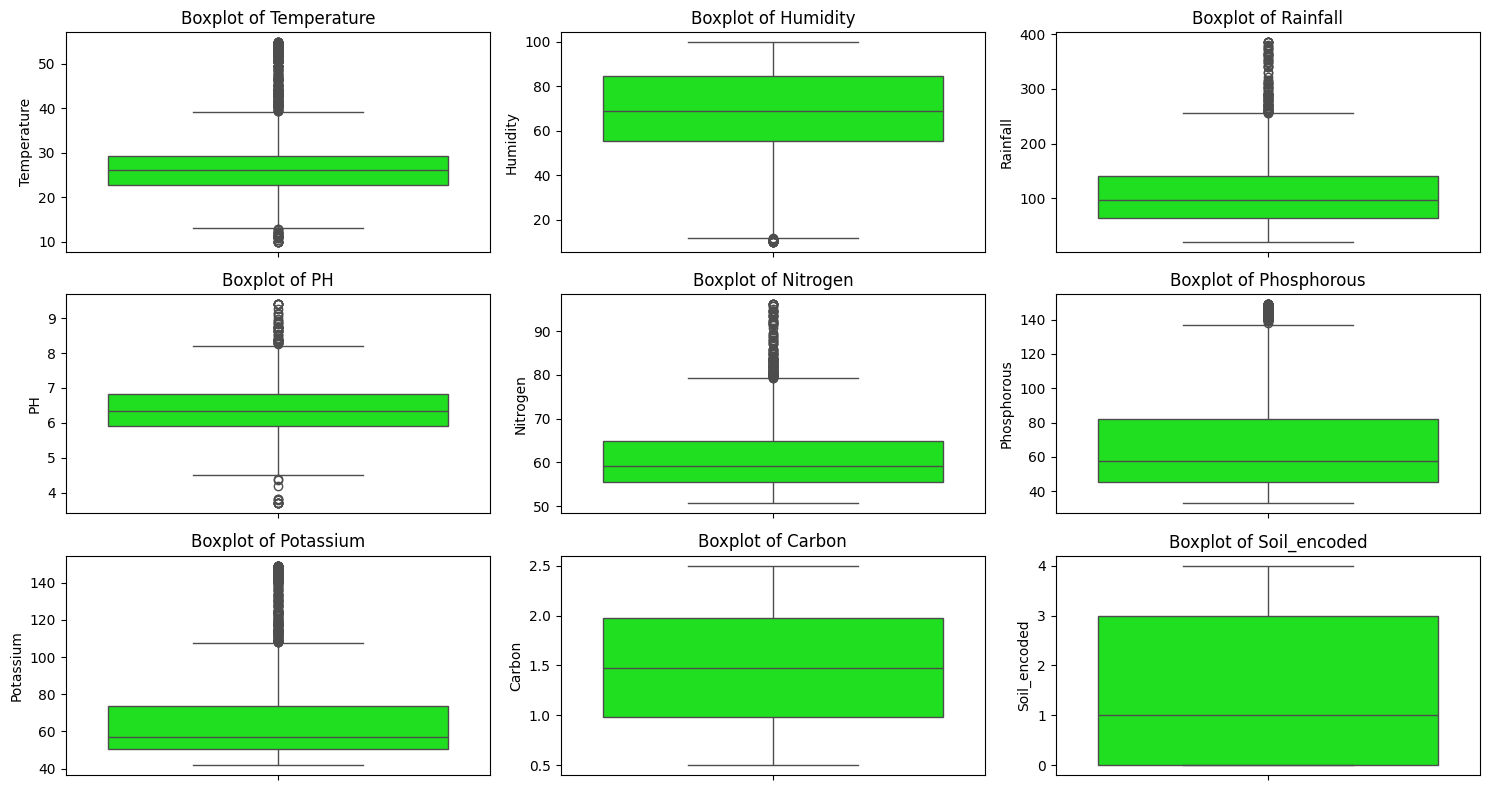

In [17]:
# Boxplots to detect outliers
plt.figure(figsize=(15,8))
# Change the subplot layout to 3 rows and 3 columns to accommodate 9 plots
for i, col in enumerate(['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon', 'Soil_encoded']):
    plt.subplot(3,3,i+1) # Changed from (2,4,i+1) to (3,3,i+1)
    sns.boxplot(y=df[col],color='lime')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Univariate Analysis

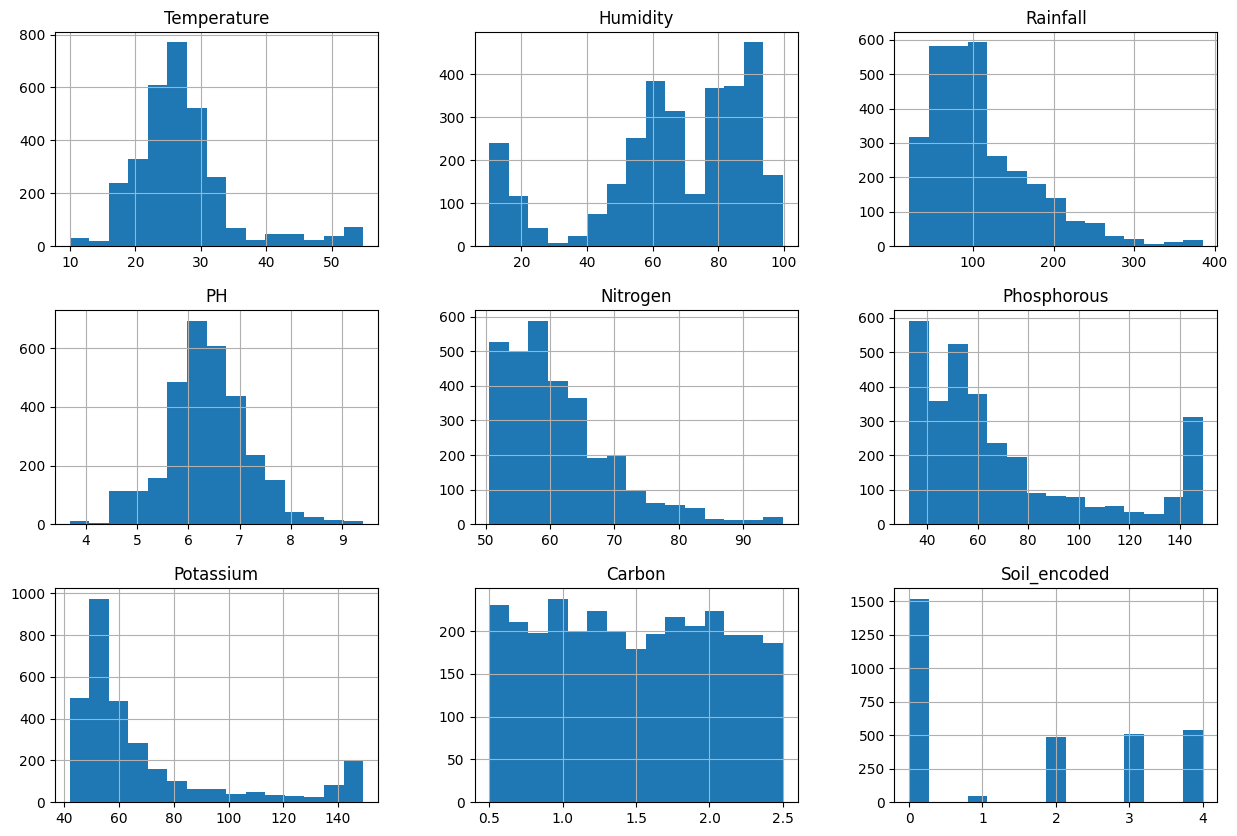

In [18]:
# Histograms for the numerical cols
df[['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Soil_encoded']].hist(bins=15, figsize=(15, 10))
plt.show()


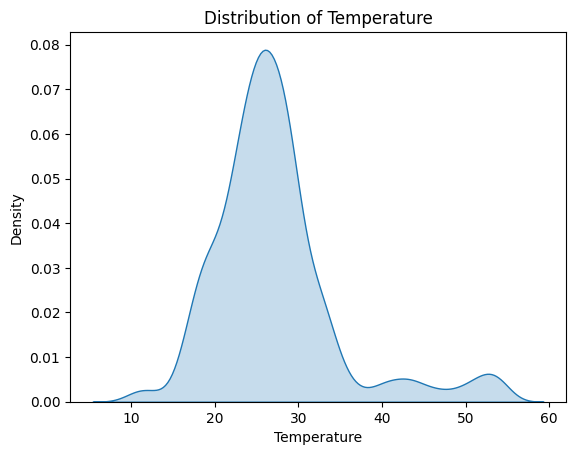

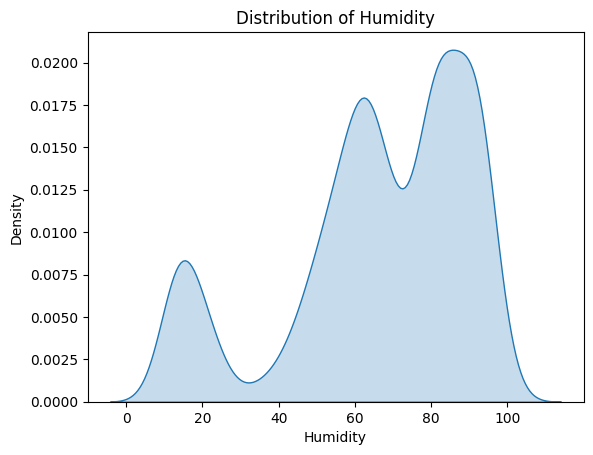

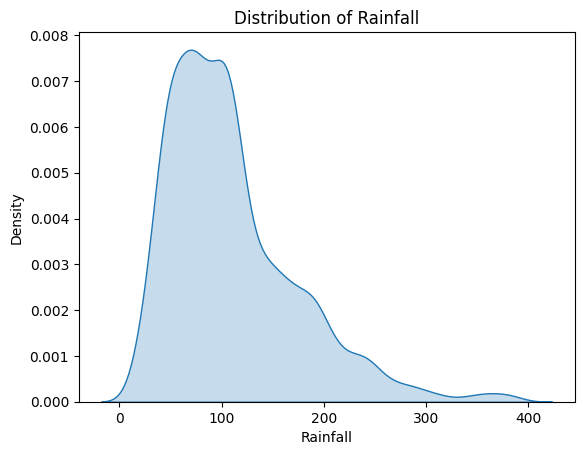

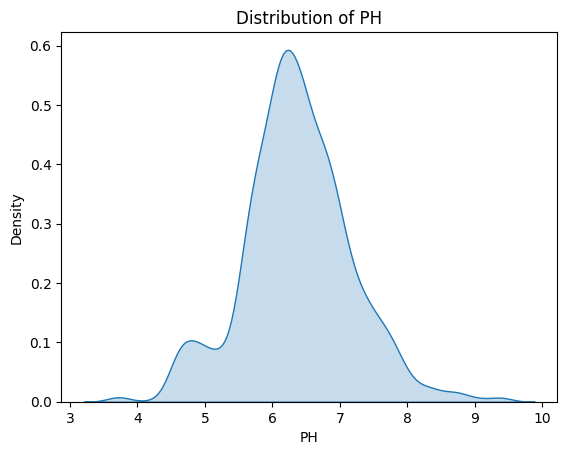

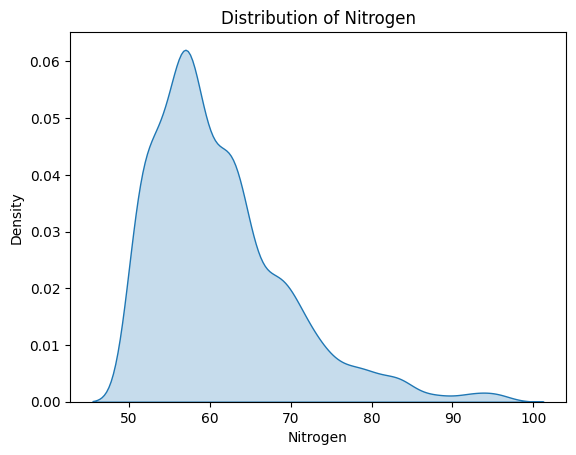

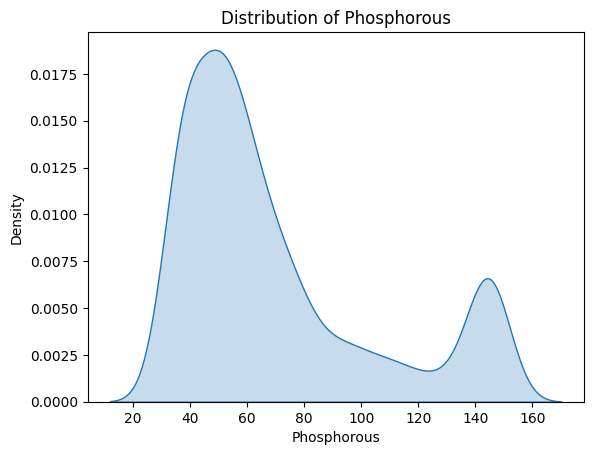

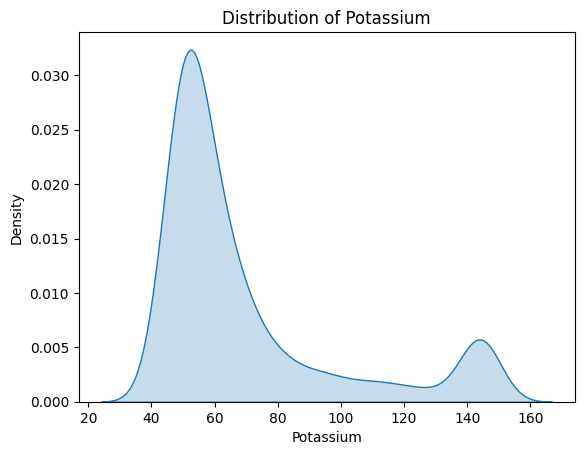

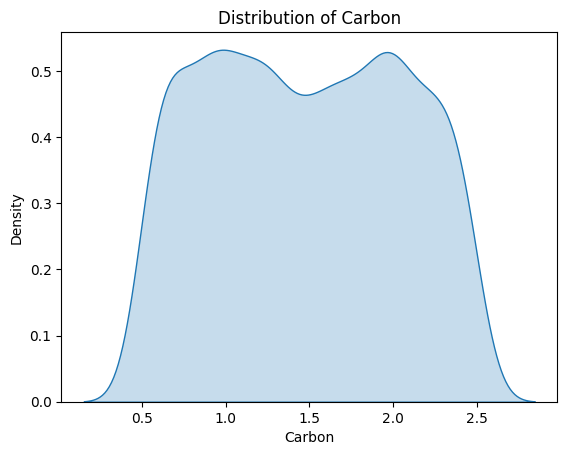

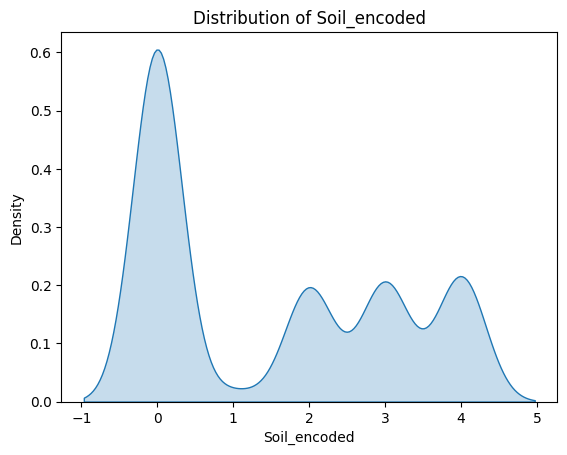

In [19]:
# KDE plots for numerical features
for col in['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Soil_encoded']:
    sns.kdeplot(df[col], fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()


## Multivariate Analysis

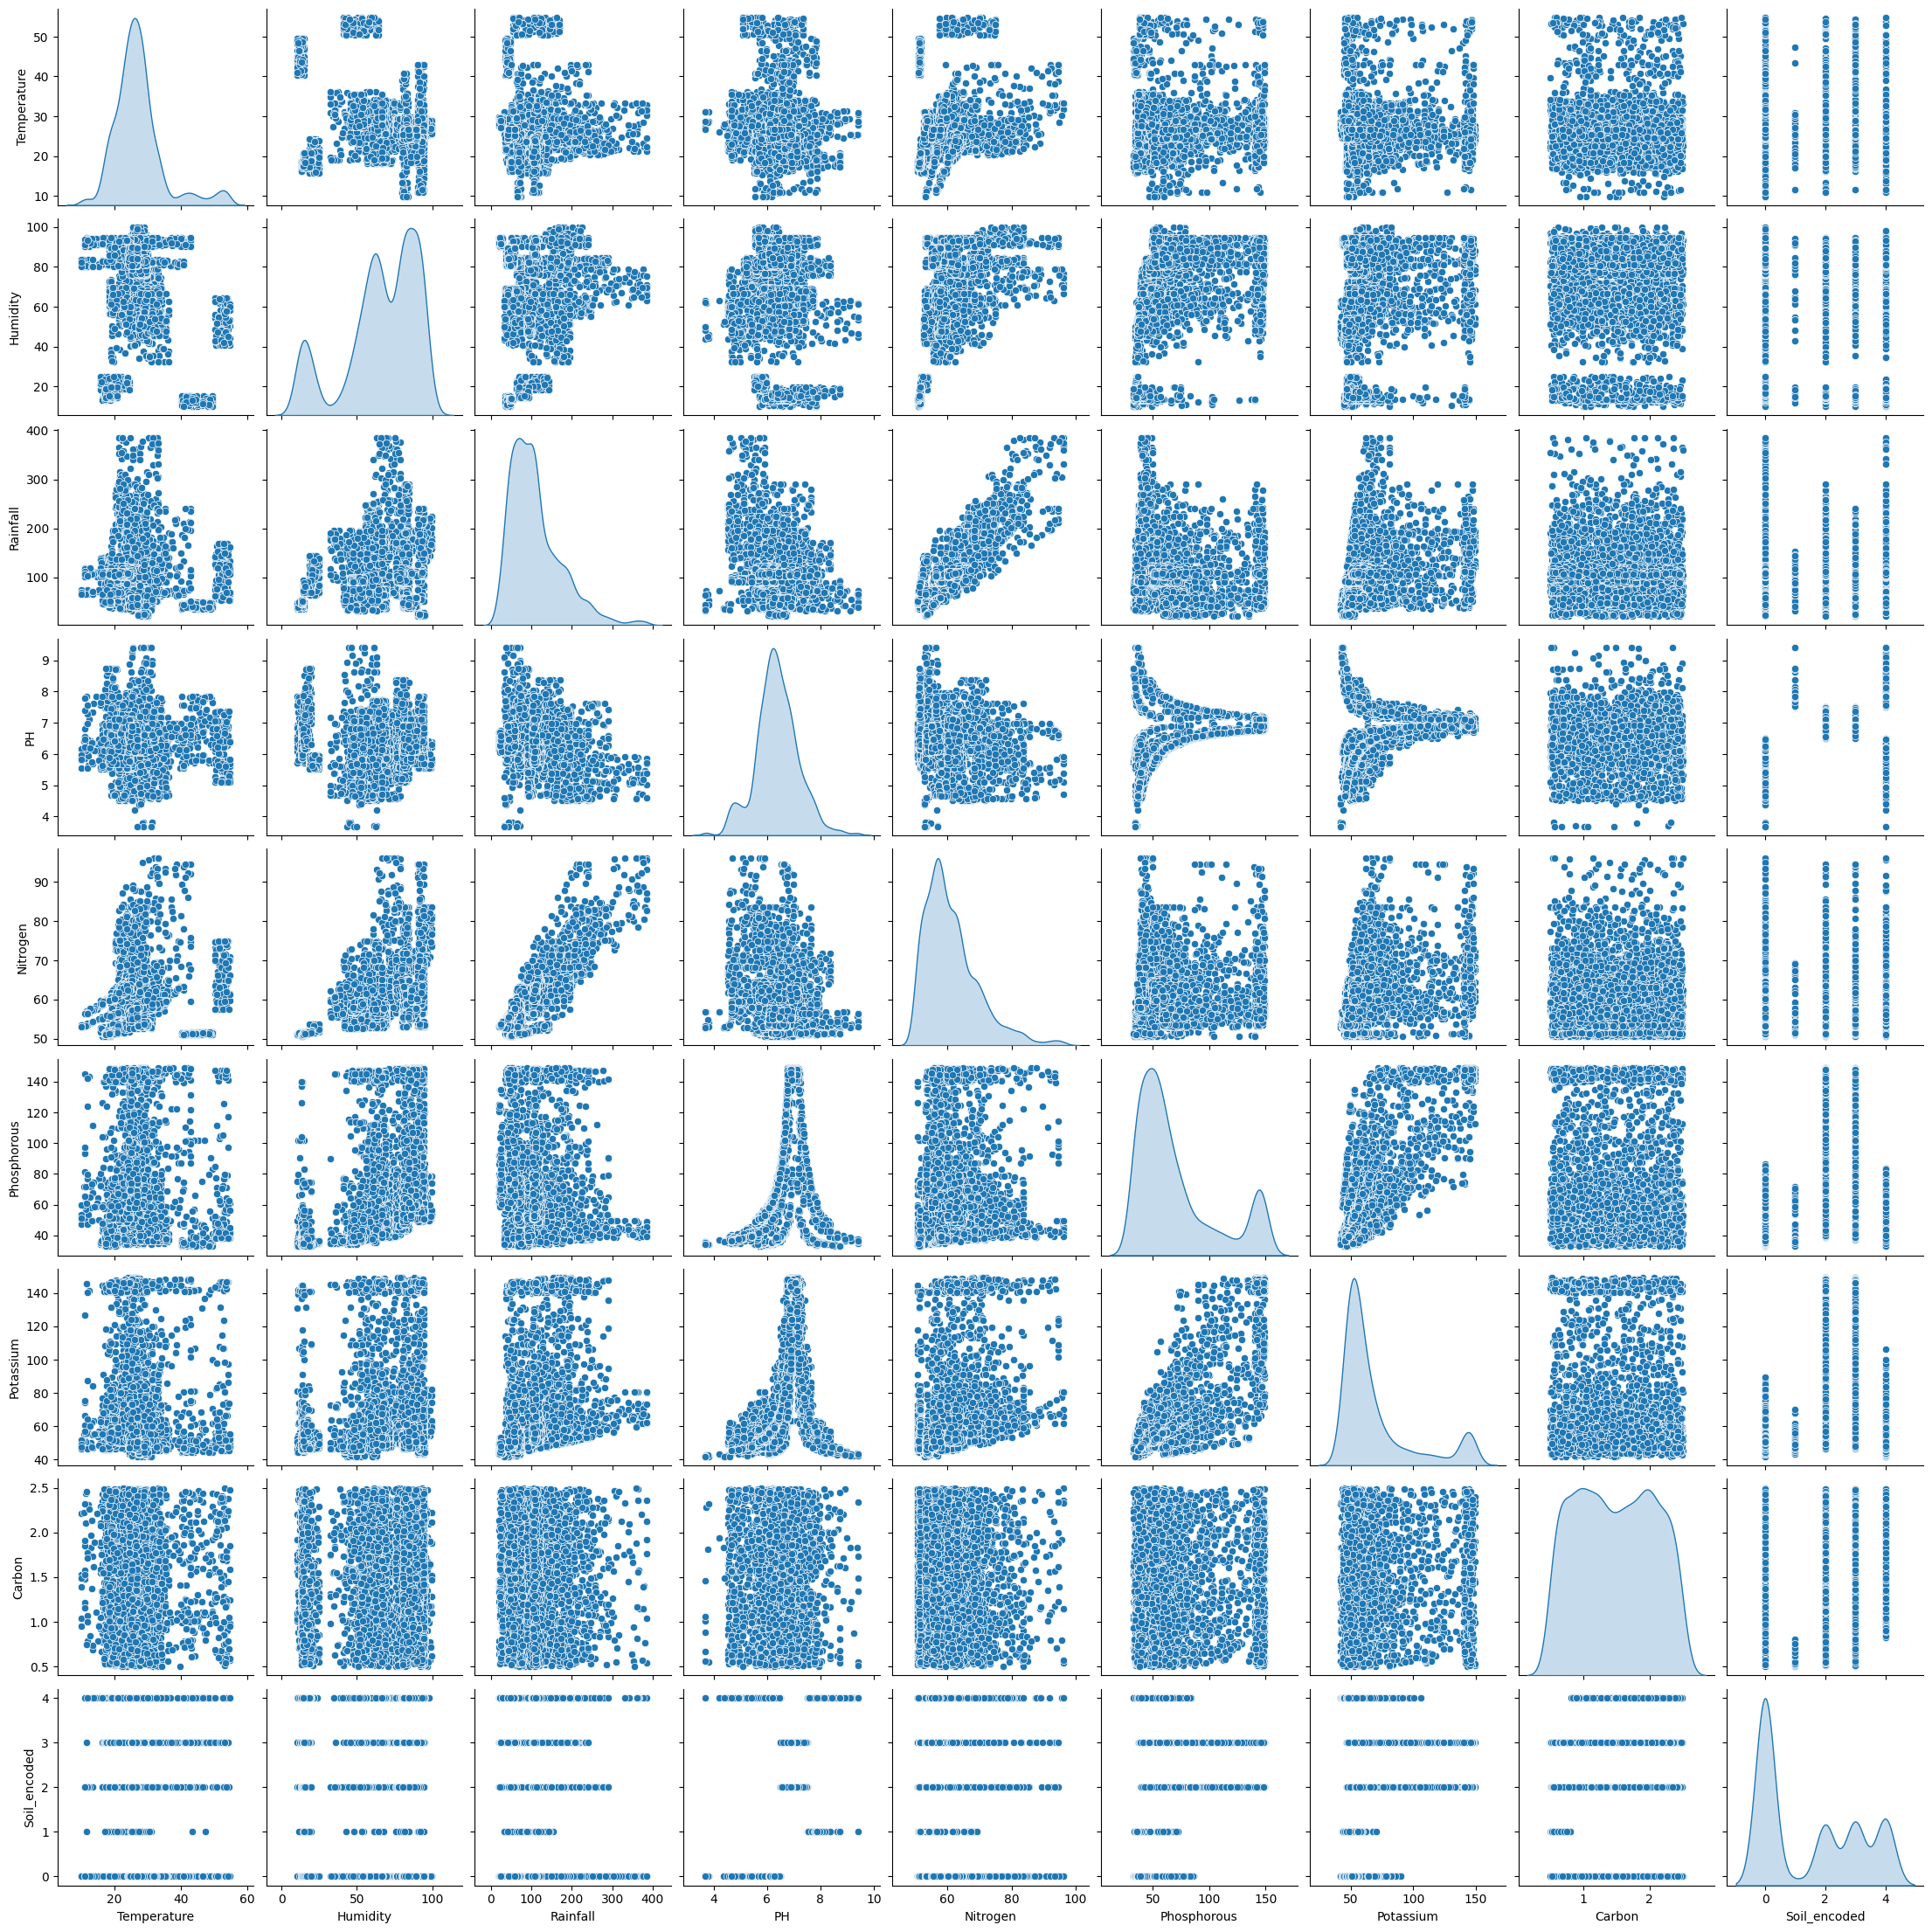

In [20]:
sns.pairplot(df, diag_kind = 'kde')
df[['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon', 'Soil_encoded']]
plt.show()

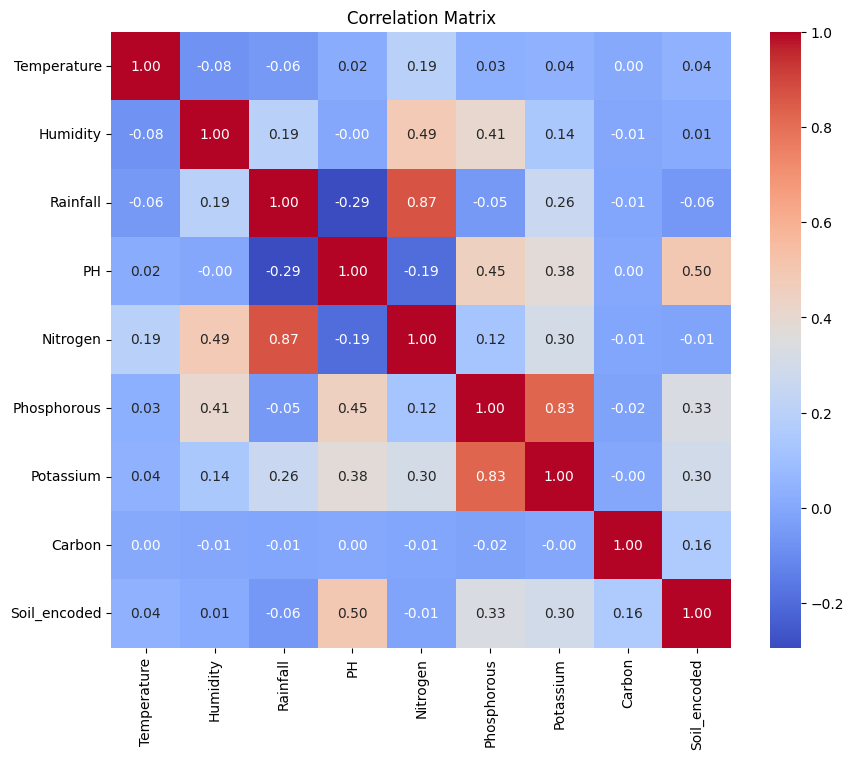

In [21]:
# Select only numeric cols
numeric_data = df.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

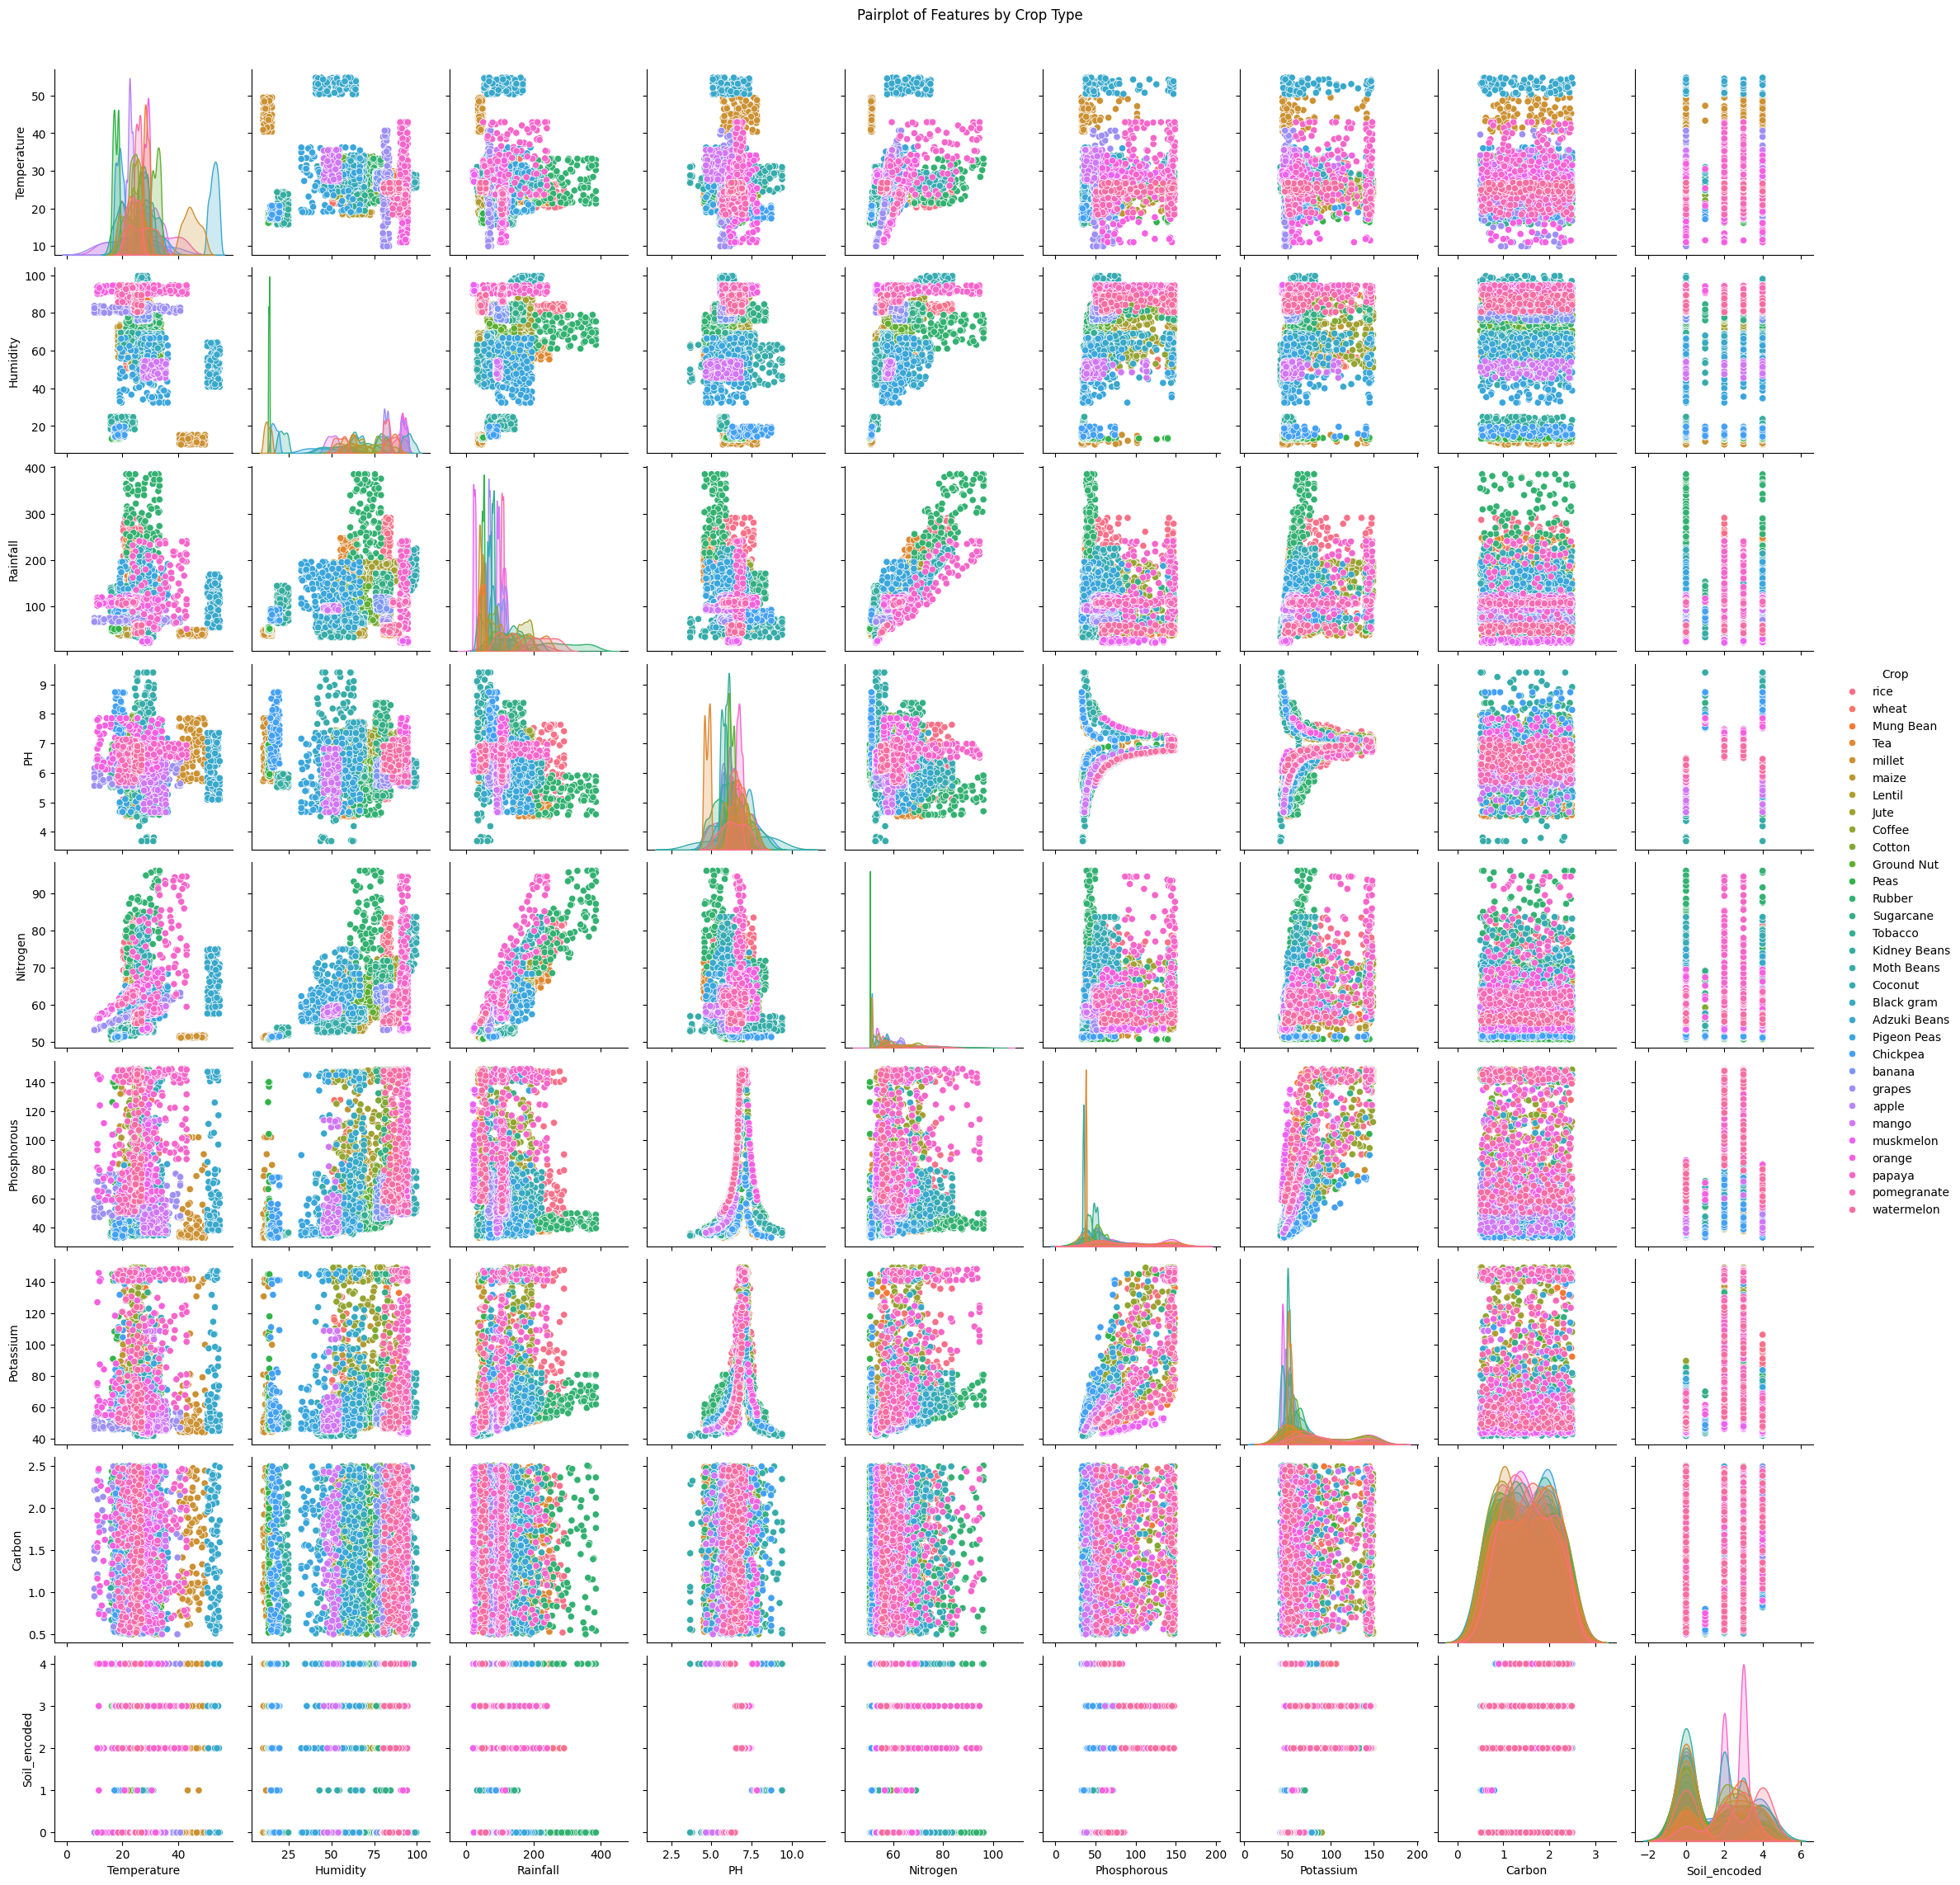

In [22]:
# Pairplot
sns.pairplot(
    df,
    vars=['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Soil_encoded'],
    hue='Crop',
    palette='husl'
)
plt.suptitle("Pairplot of Features by Crop Type", y=1.02)
plt.show()

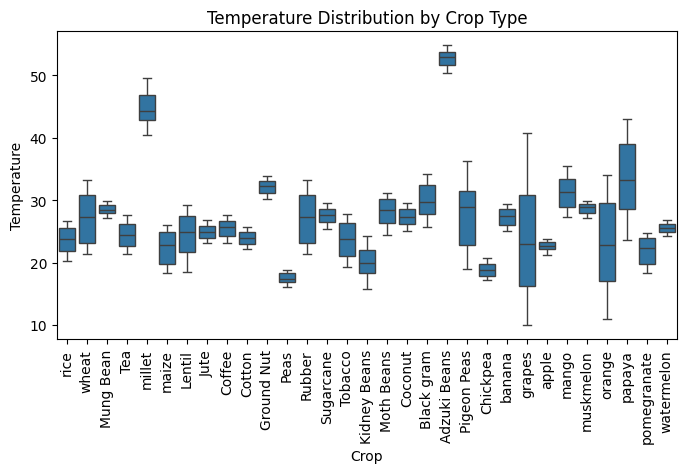

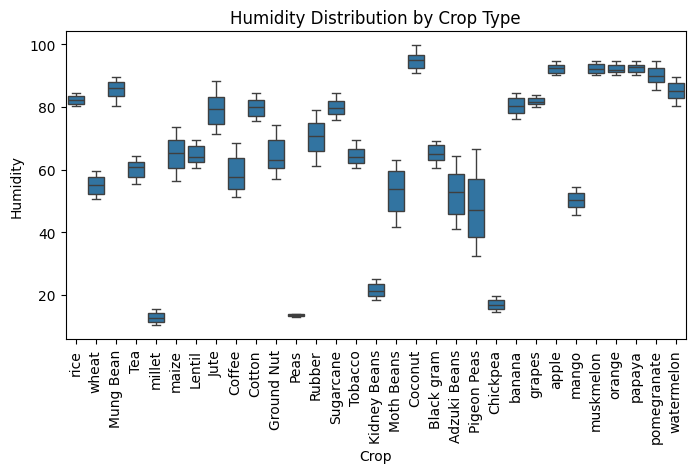

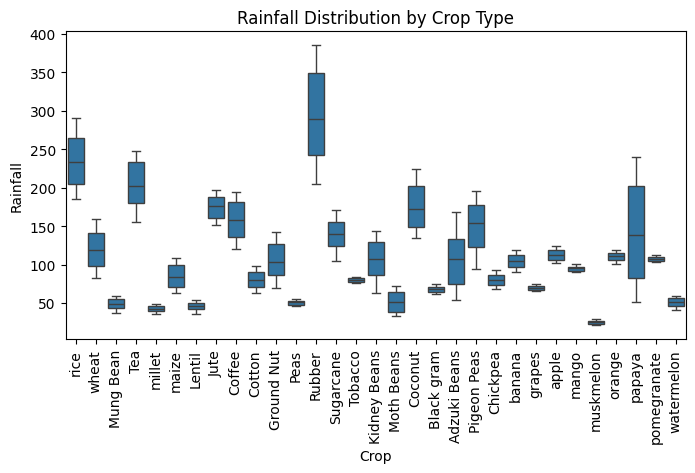

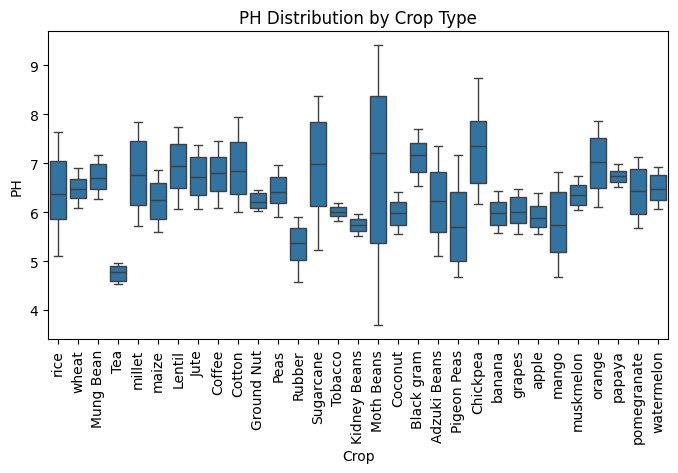

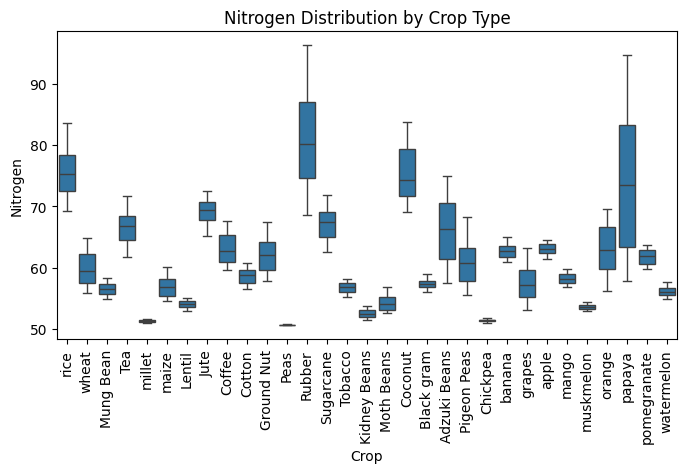

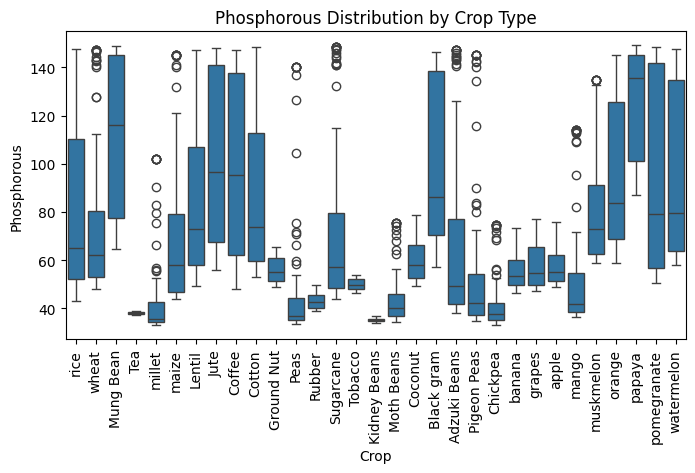

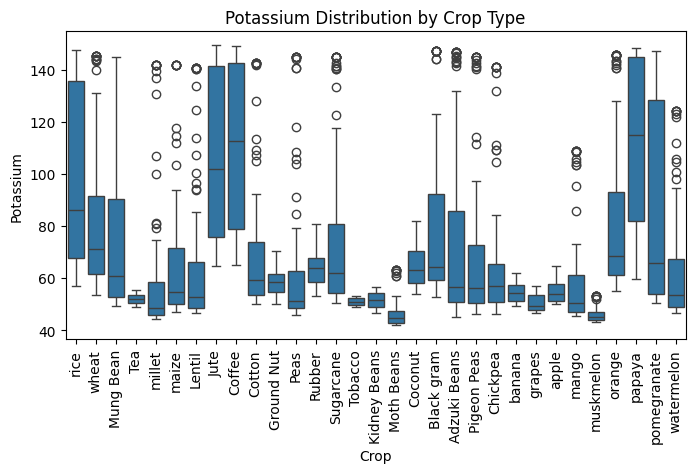

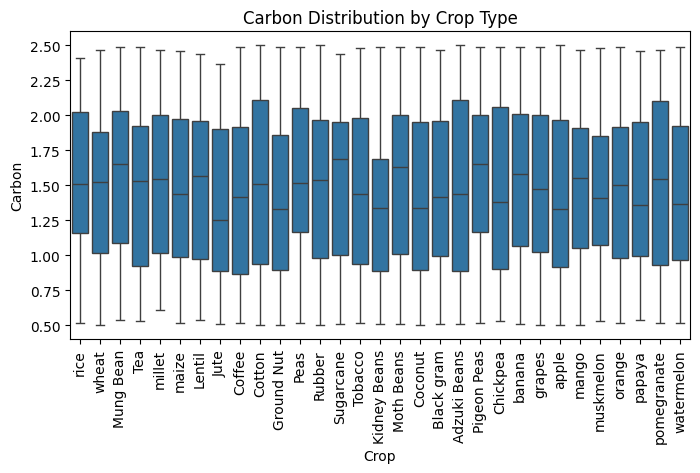

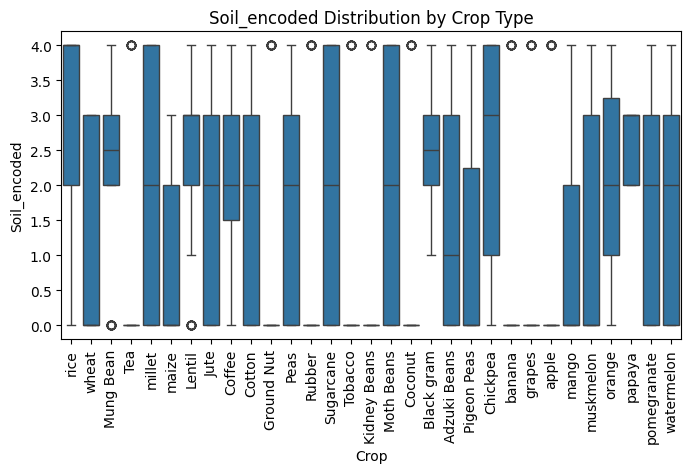

In [24]:
# Boxplots of features grouped by crop
for col in ['Temperature', 'Humidity','Rainfall','PH','Nitrogen', 'Phosphorous', 'Potassium','Carbon','Soil_encoded']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Crop', y=col, data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} Distribution by Crop Type')
    plt.show()

# Data Preparation

Data Preparation merupakan tahap untuk mempersiapkan data sebelum masuk ke tahap pembuatan model Machine Learning.

## Data Clening

In [25]:
#melakukan encoding pada bagian kolom Crop
label_encoder = LabelEncoder()
df['crop'] = label_encoder.fit_transform(df['Crop'])

In [26]:
# Mendefinisikan Label (Target)

y = df['crop']

In [27]:
# Mendefinisikan Fitur (Feature)
X = df.drop(columns=['Crop', 'crop'])

Menghapus outliers yang ada pada dataset

Pada kasus ini, kita akan mendeteksi outliers. Kemudian, menangani outliers dengan teknik IQR method.



In [28]:
# IQR Method to identify and cap Outliers
def cap_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)





In [30]:
df.shape

(3100, 11)

## Train-Test-Split

In [31]:
# Membagi Dataset Menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [32]:

# Menampilkan Jumlah Data Latih dan Data Uji

print(f'Total dataset: {len(X_train) + len(X_test)}')
print(f'Total data latih: {len(X_train)}')
print(f'Total data uji: {len(X_test)}')

Total dataset: 3100
Total data latih: 2480
Total data uji: 620


## Normalisasi

In [33]:
# Normalisasi Fitur dengan Min-Max Scaler
scaler = MinMaxScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

# Model

Lazy Predict Library
LazyPredict adalah pustaka Python yang memudahkan proses pemilihan model machine learning. Ia melakukan ini dengan secara otomatis mengevaluasi dan membandingkan berbagai algoritma pembelajaran mesin pada kumpulan data.

Keuntungan menggunakan LazyPredict:
* Cepat dan efisien: LazyPredict dapat dengan cepat mengevaluasi dan membandingkan banyak model, menghemat waktu dan tenaga.
* Mempermudah identifikasi model potensial: Alih-alih mencoba berbagai model secara manual, LazyPredict membantu menemukan model yang berpotensi berkinerja baik pada data.
* Cocok untuk analisis awal dan pembuatan prototipe: LazyPredict memudahkan untuk memulai dengan proyek machine learning dengan cepat tanpa terjebak dalam detail pemilihan model.

In [34]:
#instal lazypredict
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.7/733.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 12.2 MB/s eta 0:00:00


In [35]:
# Evaluasi Berbagai Model dengan LazyPredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier()
models,predicts = clf.fit(x_train,x_test,y_train,y_test)
print(models.sort_values(by="Accuracy",ascending=False))

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 2480, number of used features: 9
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] 

**Visualisasi Model LazyPredict**

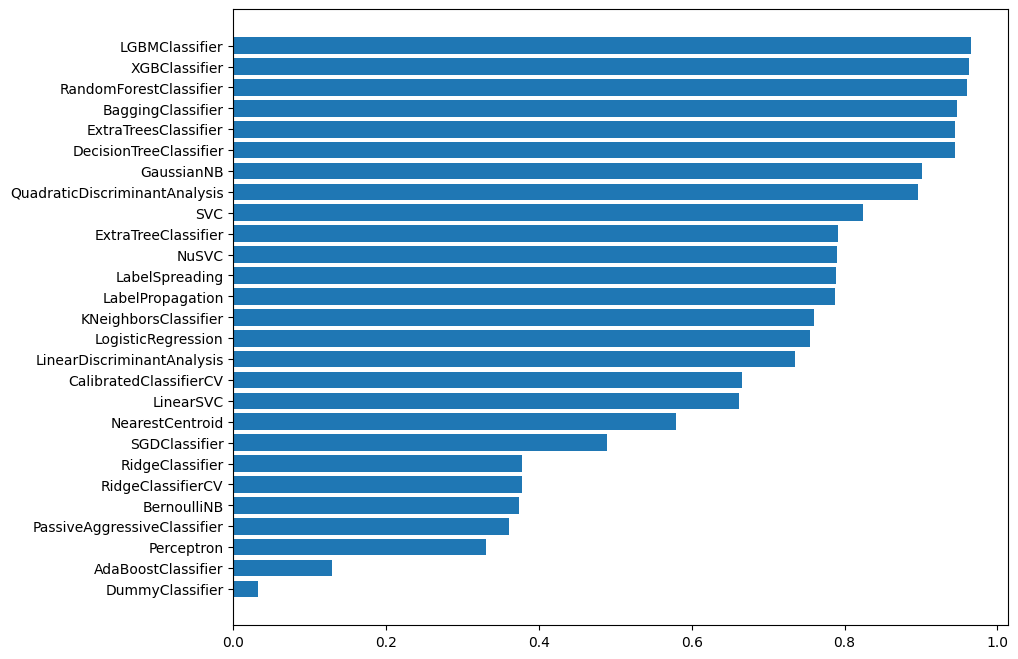

In [36]:
### Visualisasi Akurasi Model
temp = models.sort_values(by="Accuracy",ascending=True)
plt.figure(figsize=(10, 8))
plt.barh(temp.index,temp["Accuracy"])
plt.show()


In [37]:
# Membuat DataFrame untuk Menyimpan Skor Akurasi Model
models = pd.DataFrame(index=['accuracy_score'],
                      columns=['KNN', 'RandomForest'])



**KNN (K-Nearest Neighbor)**

In [38]:
# Melatih Model K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
model_knn.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [39]:
# Prediksi dan Evaluasi Akurasi Model K-Nearest Neighbors (KNN)
knn_pred = model_knn.predict(x_test)
models.loc['accuracy_score','KNN'] = accuracy_score(y_test, knn_pred)

 **Random Forest**

In [40]:
# Melatih Model Random Forest
model_rf = RandomForestClassifier(random_state=42, max_depth=42)
model_rf.fit(X_train, y_train)



RandomForestClassifier(max_depth=42, random_state=42)

In [41]:
# Prediksi dan Evaluasi Akurasi Model Random Forest
y_pred = model_rf.predict(X_test)
models.loc['accuracy_score','RandomForest'] = accuracy_score(y_test, y_pred)


# Evaluasi Model

**Score Model**

In [42]:
# Evaluasi Metode Performa Model KNN dan Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

metrics = {
    "Model": ["KNN", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, knn_pred),
        accuracy_score(y_test, y_pred),
    ],
    "Precision": [
        precision_score(y_test, knn_pred, average='weighted'),
        precision_score(y_test, y_pred, average='weighted'),
    ],
    "Recall": [
        recall_score(y_test, knn_pred, average='weighted'),
        recall_score(y_test, y_pred, average='weighted'),
    ],
    "F1 Score": [
        f1_score(y_test, knn_pred, average='weighted'),
        f1_score(y_test, y_pred, average='weighted'),
    ]
}

# Tampilkan dalam tabel
df_metrics = pd.DataFrame(metrics)
print(df_metrics)

           Model  Accuracy  Precision  Recall  F1 Score
0            KNN      0.75       0.75    0.75      0.73
1  Random Forest      0.96       0.96    0.96      0.96


**Plot Model**

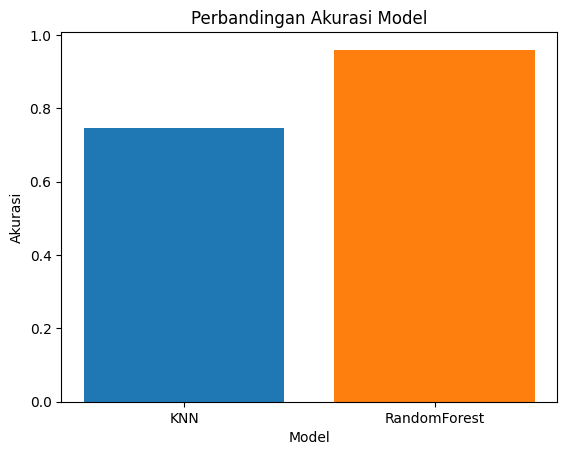

In [43]:
# Visualisasi Perbandingan Akurasi Model KNN dan Random Forest
plt.bar('KNN', models['KNN'])
plt.bar('RandomForest', models['RandomForest'])
plt.title("Perbandingan Akurasi Model");
plt.xlabel('Model');
plt.ylabel('Akurasi');
plt.show()